In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv
from datetime import datetime

In [2]:
# Presentació a meneame.net 'Hola, sóc un Firefox en Ubuntu Linux'- Necessari a fi que meneame ens contesti
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:87.0) Gecko/20100101 Firefox/87.0"
headers = {"user-agent": USER_AGENT}

In [3]:
# Scraping de l'agregador Meneame

titular = []
web = []
usuari = []
meneos = []
clics = []
comentaris = []
v_positius = []
v_anonims = []
v_negatius = []
sub = []
karma = []
created = []

# Fem scraping a meneame.net de la portada i les 9 portades anteriors.

for counter in range(1,11):
    URL = "https://www.meneame.net/?page="+str(counter)
    # Petició: què hi ha avui?
    page=requests.get(URL, headers=headers)
    meneame = page.content
    soup = BeautifulSoup(meneame,"html.parser")
    # Scraping de: Titular - Web - Usuari
    for i in soup.find_all('div',{'class':'center-content'}):
        noticia = i.find('a')
        t = noticia.string
        w = noticia['href']
        u_usuari = noticia.find_next('a')['href']
        u = u_usuari.split('/')[2]
        titular.append(t)
        web.append(w)
        usuari.append(u)
    # Scraping de: Meneos
    for i in soup.find_all('div',{'class':'votes'}):
        noticia_m = i.find('a')
        # aixó és perque hi han algunes class:votes que no tenen info
        if noticia_m != None:
            m = noticia_m.string
            meneos.append(m)
    # Scraping de: Clics   
    for i in soup.find_all('div',{'class':'clics'}):
        c = i.find('span').string
        if c != None:
            clics.append(c)
    # Scraping de: Comentaris
    for i in soup.find_all('div',{'class':'news-details-main'}):
        com = i.find('a')['data-comments-number']
        comentaris.append(com)
    # Scraping de: Vots positius - Vots anónims - Vots negatius - Sub - Karma
    for i in soup.find_all('div',{'class':'news-details-data-up'}):
        x = i.find_all('span') #x es un bs4.element.ResultSet
        v_positius.append(x[2].string)
        v_anonims.append(x[5].string)
        v_negatius.append(x[8].string)
        karma.append(x[12].string)
        sub.append(x[13].a.string)
    # Scraping de: Data de creació
    for i in soup.find_all('div',{'class':'news-submitted'}):
        x = str(i.find_all('span',{'class':'ts visible'})[0])
        z = int(x.split('=')[2].split(' ')[0].replace('"',''))
        c = datetime.fromtimestamp(z)
        created.append(c)

In [4]:
# Creem el csv
n = datetime.now()
ara = n.strftime("%d_%m_%y_%H_%M_")
csv_name = 'MenScraping_'+ara+'.csv'
meneame_file = open(csv_name, mode='w')
meneame_writer = csv.writer(meneame_file, delimiter=',')

In [5]:
# Escrivim les dades al csv i el tanquem
meneame_writer.writerow(['ID','Titular','Data Creació','Web','Usuari','Meneos','Clics','Comentaris','Vots Positius','Vots Anònims','Vots Negatius','Sub','Karma'])
for i in range(len(titular)):
    meneame_writer.writerow([i, titular[i], created[i], web[i],usuari[i],meneos[i],clics[i],comentaris[i],v_positius[i],v_anonims[i],v_negatius[i],sub[i],karma[i]])
meneame_file.close()

In [6]:
# Convertim el fitxer csv en datagrama per a obtenir gràfiques
menDF= pd.read_csv(csv_name)
menDF.head()

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
0,0,La Junta Electoral amonesta por tercera vez a...,2021-04-10 11:16:12,https://elpais.com/espana/madrid/2021-04-10/la...,Ñbrevu,177,353,31,83,94,3,politica,436
1,1,Iglesias propone dentista y psiquiatra gratis...,2021-04-10 08:29:59,https://amp.europapress.es/madrid/noticia-igle...,rodda2206,416,425,292,208,208,10,actualidad,457
2,2,"La Cabra: ""Control Mental"" (Pierre Richard&Ge...",2021-04-10 08:51:35,https://www.youtube.com/watch?v=qtZGsygrQBk,esbrutafio,110,3360,18,68,42,2,ocio,507
3,3,Vivir sobre 5.000 mill. de €: la mina de oro ...,2021-04-10 09:51:54,https://www.xataka.com/ecologia-y-naturaleza/v...,rodda2206,159,2332,47,70,89,3,actualidad,524
4,4,"II República ""Mataban a los intelectuales, a ...",2021-04-10 09:16:21,https://twitter.com/laSextaColumna/status/1380...,rodda2206,362,1730,76,181,181,7,actualidad,382


In [7]:
# Definim columnes del datagrama per a gràfiques tipus scatter
meneos=menDF['Meneos']
clics=menDF['Clics']
comen=menDF['Comentaris']
vmas=menDF['Vots Positius']
vmen=menDF['Vots Negatius']
vanon=menDF['Vots Anònims']
karma=menDF['Karma']

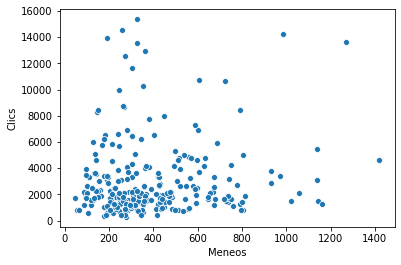

In [8]:
# Analitzem les correlacions entre variables numèriques:
# A soles hi ha correlació entre 'Meneos' i 'Vots Positius' o 'Vots Anònims'
sns.scatterplot(x=meneos,y=clics)
plt.show()

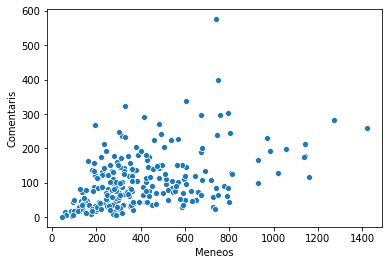

In [9]:
sns.scatterplot(x=meneos,y=comen)
plt.show()

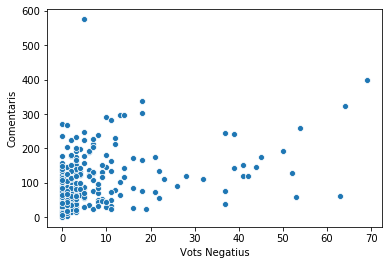

In [10]:
# Els vots negatius no es molesten en fer comentaris: no estan correlacionats
sns.scatterplot(x=vmen,y=comen)
plt.show()

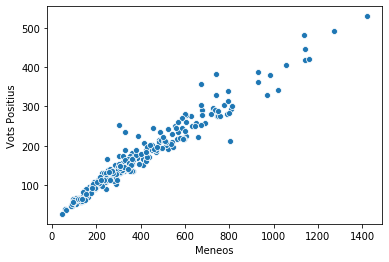

In [11]:
# Els vots anònims i els vots positius estan correlacionats:
# un de cada tres meneos vota positiu
sns.scatterplot(x=meneos,y=vmas)
plt.show()

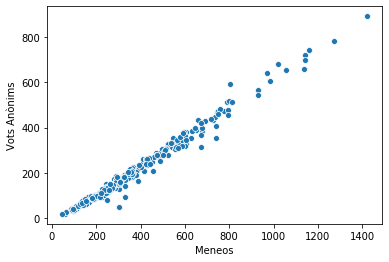

In [12]:
# Els vots anònims i els 'meneos' estan correlacionats:
sns.scatterplot(x=meneos,y=vanon)
plt.show()

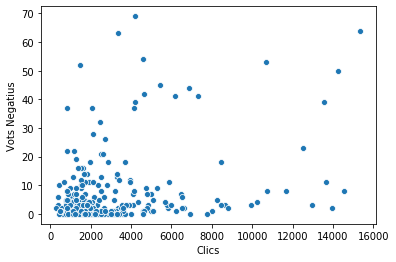

In [13]:
# Pocs clics voten negativament
sns.scatterplot(x=clics,y=vmen)
plt.show()

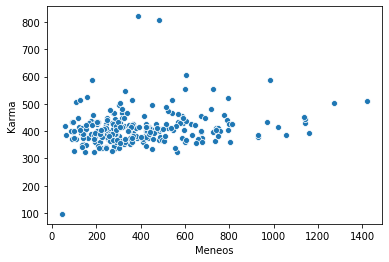

In [14]:
# No hi ha correlació entre el karma de la notícia i els meneos 
sns.scatterplot(x=meneos,y=karma)
plt.show()

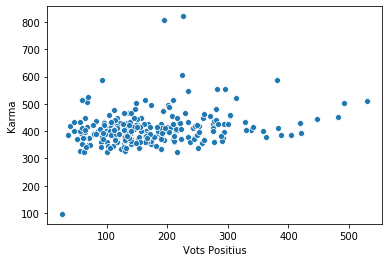

In [15]:
#  Tampoc hi ha correlació entre el karma de la notícia i els vots positius
sns.scatterplot(x=vmas,y=karma)
plt.show()

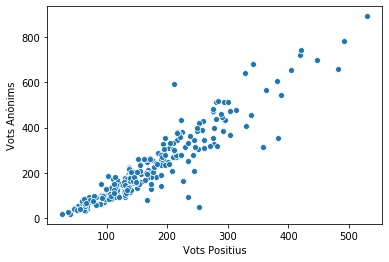

In [16]:
# Els vots anònims i els vots positius estan correlacionats:
sns.scatterplot(x=vmas,y=vanon)
plt.show()

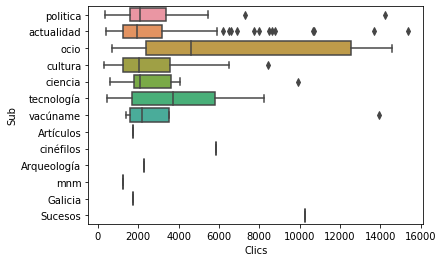

In [17]:
# Anàlisi per variables categòriques:
cat=menDF['Sub']
usuari=menDF['Usuari']

# Quines categories reben més clics (segueixen l'enllaç per llegir la notícia)?
# Hi ha outliers?
sns.boxplot(x=clics,y=cat)
plt.show()

In [18]:
# Qui rep màxim de clics.
mx=max(clics)
menDF[menDF['Clics']>=mx]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
113,113,Lo que ha pasado esta tarde en Vallecas resum...,2021-04-07 23:23:51,https://twitter.com/spanishrevorg/status/13798...,Álvaro91,328,15364,322,234,94,64,actualidad,546


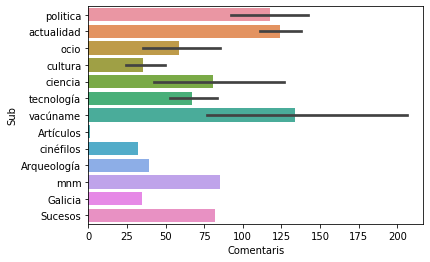

In [19]:
# Quin tema és el què rep més comentaris?
sns.barplot(x=comen,y=cat)
plt.show()

In [20]:
# Qui és  l'usuari que rep, en la mitjana, més comentaris?
import numpy as np
grouped = menDF.groupby('Usuari')
menDF[menDF['Comentaris']==max(grouped['Comentaris'].agg(np.mean))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
48,48,Pablo Iglesias confirma que no se presentará ...,2021-04-09 10:16:24,https://www.20minutos.es/noticia/4649588/0/pab...,libtalker,739,1434,575,383,356,5,actualidad,413


In [21]:
# Qui és l'usuari que rep, en la mitjana, més meneos?
menDF[menDF['Meneos']==max(grouped['Meneos'].agg(np.mean))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
82,82,Un agente antidisturbios lanza una piedra a l...,2021-04-08 16:30:35,https://twitter.com/Miquel_R/status/1380161401...,nitsuga.blisset,1271,13661,282,491,780,11,actualidad,503


In [22]:
# Qui és l'usuari que rep, en la mitjana, més vots positius?
menDF[menDF['Vots Positius']==max(grouped['Vots Positius'].agg(np.mean))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
82,82,Un agente antidisturbios lanza una piedra a l...,2021-04-08 16:30:35,https://twitter.com/Miquel_R/status/1380161401...,nitsuga.blisset,1271,13661,282,491,780,11,actualidad,503


In [23]:
# Qui és l'usuari amb més karma:
# augmenta per resultats positius, et lleven per actitud negativa)?
menDF[menDF['Karma']==max(grouped['Karma'].agg(np.max))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
45,45,"Muere el príncipe Felipe, marido de la reina ...",2021-04-09 13:09:09,https://mundo.sputniknews.com/20210409/muere-e...,A_D,390,2373,181,226,164,10,actualidad,821


In [24]:
# Qui és l'usuari que rep, en la mitjana, més vots negatius?
menDF[menDF['Vots Negatius']==max(grouped['Vots Negatius'].agg(np.max))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
95,95,Santiago Abascal encuentra en Vallecas lo que...,2021-04-08 07:43:52,https://www.eldiario.es/politica/santiago-abas...,Llaqui,750,4216,399,275,475,69,actualidad,411


In [25]:
# Quina és la notícia què rep més vots negatius?
mx=max(vmen)
menDF[menDF['Vots Negatius']>=mx]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
95,95,Santiago Abascal encuentra en Vallecas lo que...,2021-04-08 07:43:52,https://www.eldiario.es/politica/santiago-abas...,Llaqui,750,4216,399,275,475,69,actualidad,411


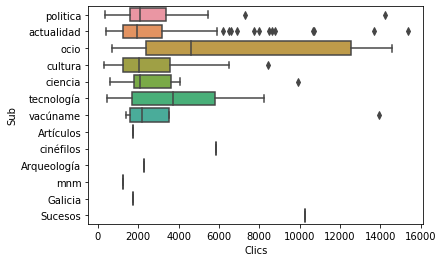

In [26]:
# En general, hi ha un fum d'outliers, potser perquè no és fàcil encaixar en una categoria l'aportació
# (o els outliers són la veritable notícia)
sns.boxplot(x=clics,y=cat)
plt.show()

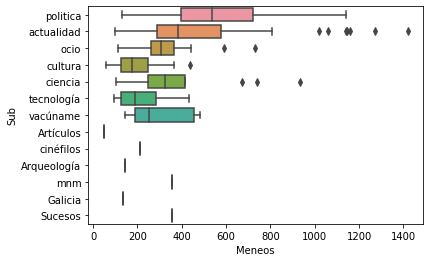

In [27]:
sns.boxplot(x=meneos,y=cat)
plt.show()

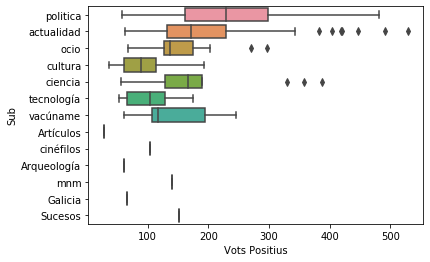

In [28]:
sns.boxplot(x=vmas,y=cat)
plt.show()

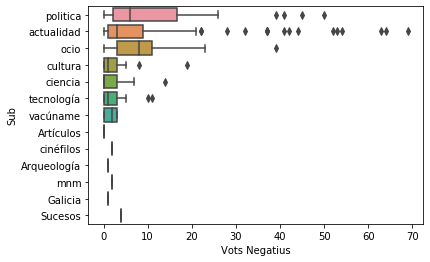

In [29]:
sns.boxplot(x=vmen,y=cat)
plt.show()

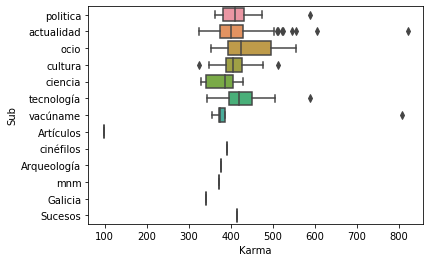

In [30]:
sns.boxplot(x=karma,y=cat)
plt.show()